In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
store = pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
print(data.shape)
print(store.shape)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)
(1115, 10)


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
test = pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')

In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
submission = pd.read_csv('/kaggle/input/rossmann-store-sales/sample_submission.csv')

In [8]:
submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
data.describe()[['Sales','Customers']].loc['mean']

Sales        5773.818972
Customers     633.145946
Name: mean, dtype: float64

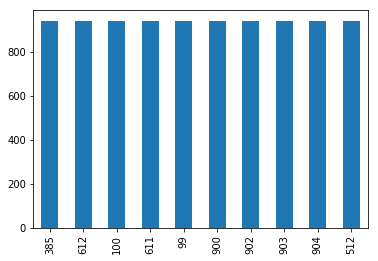

In [12]:
data.Store.nunique()
data.Store.value_counts().head(10).plot.bar()
data.Store.value_counts().tail(10).plot.bar()

In [13]:
data.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [14]:
data.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [15]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
data.Store.unique()[0]

1

1
(942, 9)


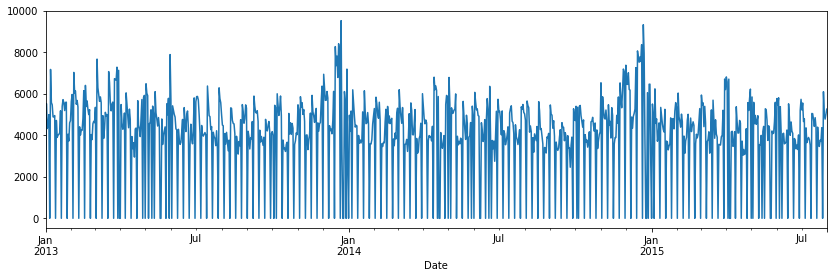

In [18]:
data['Date'] = pd.to_datetime(data['Date'],format = '%Y-%m-%d')
store_id=data.Store.unique()[0]
print(store_id)
store_rows=data[data['Store']==store_id]
print(store_rows.shape)
store_rows.resample('1D',on='Date')['Sales'].sum().plot.line(figsize=(14,4))

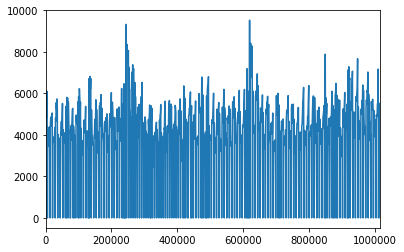

In [19]:
store_rows['Sales'].plot.line()

In [20]:
store_rows[store_rows['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5575,1,7,2015-07-26,0,0,0,0,0,0
13380,1,7,2015-07-19,0,0,0,0,0,0
21185,1,7,2015-07-12,0,0,0,0,0,0
28990,1,7,2015-07-05,0,0,0,0,0,0
36795,1,7,2015-06-28,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
987105,1,7,2013-01-27,0,0,0,0,0,0
994910,1,7,2013-01-20,0,0,0,0,0,0
1002715,1,7,2013-01-13,0,0,0,0,0,0
1010520,1,7,2013-01-06,0,0,0,0,0,1


In [21]:
store_rows.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [22]:
test['Date']=pd.to_datetime(test['Date'],format='%Y-%m-%d')
store_test_rows=test[test['Store']==store_id]
store_test_rows['Date'].min(),store_test_rows['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [23]:
store_test_rows['Open'].value_counts()

1.0    41
0.0     7
Name: Open, dtype: int64

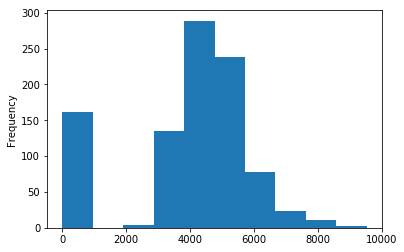

In [24]:
store_rows['Sales'].plot.hist()

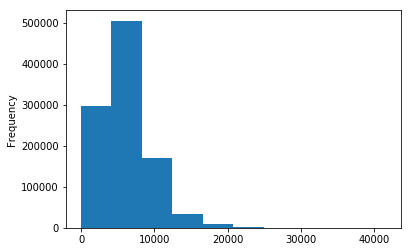

In [25]:
data['Sales'].plot.hist()

In [26]:
store[store['Store']==store_id].T

,0
Store,1
StoreType,c
Assortment,a
CompetitionDistance,1270
CompetitionOpenSinceMonth,9
CompetitionOpenSinceYear,2008
Promo2,0
Promo2SinceWeek,NaN
Promo2SinceYear,NaN
PromoInterval,NaN


In [27]:
store['PromoInterval'].head()

0                NaN
1    Jan,Apr,Jul,Oct
2    Jan,Apr,Jul,Oct
3                NaN
4                NaN
Name: PromoInterval, dtype: object

In [28]:
store[~store['PromoInterval'].isna()].iloc[0]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

In [29]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [30]:
store['Promo2SinceWeek']=store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear']=store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
store['PromoInterval']=store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])


In [31]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [32]:
data_merged= data.merge(store,on='Store',how='left')
print(data_merged.shape)

(1017209, 18)


In [33]:
data_merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [34]:
data_merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [35]:
data_merged['day']=data_merged['Date'].dt.day
data_merged['month']=data_merged['Date'].dt.month
data_merged['year']=data_merged['Date'].dt.year



In [36]:
data_merged['StateHoliday'].unique()
data_merged['StateHoliday']=data_merged['StateHoliday'].map({'0':0 , 0:0, 'a':1, 'b':2, 'c':3})
data_merged['StateHoliday']=data_merged['StateHoliday'].astype(int)

In [37]:
print(data_merged['Assortment'].unique())
data_merged['Assortment']=data_merged['Assortment'].map({ 'a':1, 'b':2, 'c':3})
print(data_merged['Assortment'].unique())
data_merged['Assortment']=data_merged['Assortment'].astype(int)

['a' 'c' 'b']
[1 3 2]


In [38]:

data_merged['StoreType'] = data_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
data_merged['StoreType'] = data_merged['StoreType'].astype(int)


In [39]:
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
data_merged['PromoInterval'] = data_merged['PromoInterval'].map(map_promo)

In [40]:
!pip install pydotplus


     |████████████████████████████████| 286kB 2.8MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=24566 sha256=36ab6a6459ba211592e9c1a1a46e7f8f590d71b83e62524e0633de50fd294c60
  Stored in directory: /tmp/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [41]:
from sklearn.model_selection import train_test_split
features = data_merged.columns.drop(['Sales','Customers','Date'])
X = data_merged[features]
y = np.log(data_merged['Sales']+1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)



In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
model_dt  = DecisionTreeRegressor(max_depth =20, random_state = 42).fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
y_inv = np.exp(y_test)-1
y_pred_inv = np.exp(y_pred)-1
np.sqrt(mean_squared_error(y_inv,y_pred_inv))

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

validate_y_inv = np.exp(y_test)-1
validate_y_pred_inv = np.exp(y_pred)-1
rmse_val = np.sqrt(mean_squared_error(validate_y_inv,validate_y_pred_inv))
rmspe_val = rmspe(validate_y_inv,validate_y_pred_inv)
print(rmse_val,rmspe_val)
                   


1347.6571873675941 0.19775078831973444


In [43]:
from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':list(range(5,15))}
#base_model = DecisionTreeRegressor()
#cv_model = GridSearchCV(base_model,param_grid=parameters,cv=5,return_train_score=True).fit(X_train,y_train)
#parameters

In [44]:
# cv_results=pd.DataFrame(cv_model.cv_results_).sort_values(by='mean_test_score',ascending=False)
# cv_results

In [45]:
# import matplotlib.pyplot as plt
# cv_results.set_index('param_max_depth')['mean_test_score'].plot.line()
# cv_results.set_index('param_max_depth')['mean_train_score'].plot.line()
# plt.grid(True)
# #plt.legend(['Test_Score','Train_Score'])

In [46]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree
    
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [47]:

#draw_tree(model_dt,X.columns)

In [48]:
train_avg_cust = data.groupby(['Store'])[['Customers']].mean().reset_index().astype(int)
test_1 = test.merge(train_avg_cust,on = 'Store',how = 'left')
test.shape,test_1.shape

((41088, 8), (41088, 9))

In [49]:
test_merged = test_1.merge(store,on = 'Store',how = 'inner')
test_merged['Open'] = test_merged['Open'].fillna(1)
test_merged['Date'] = pd.to_datetime(test_merged['Date'],format = '%Y-%m-%d')
test_merged['day'] = test_merged['Date'].dt.day
test_merged['month'] = test_merged['Date'].dt.month
test_merged['year'] = test_merged['Date'].dt.year
test_merged['StateHoliday'] = test_merged['StateHoliday'].map({'0':0,'a':1})
test_merged['StateHoliday'] = test_merged['StateHoliday'].astype(int)
test_merged['Assortment'] = test_merged['Assortment'].map({'a':1,'b':2,'c':3})
test_merged['Assortment'] = test_merged['Assortment'].astype(int)
test_merged['StoreType'] = test_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
test_merged['StoreType'] = test_merged['StoreType'].astype(int)
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
test_merged['PromoInterval'] = test_merged['PromoInterval'].map(map_promo)
test_pred = model_dt.predict(test_merged[features])
test_pred_inv = np.exp(test_pred)-1

In [50]:
submission_predicted = pd.DataFrame({'Id' : test['Id'],'Sales':test_pred_inv })
submission_predicted.head()

,Id,Sales
0,1,5038.405789
1,2,5038.405789
2,3,5344.409214
3,4,5489.300418
4,5,0.000000


In [51]:
submission_predicted.to_csv('submission.csv',index = False)

In [52]:
submission_predicted.to_csv('submission.csv',index = False)